In [1]:
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.utils import to_categorical

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Import DataSet -> Using the Dataset of CIFAR where 10 Labels are our TARGET Variable

from keras.datasets import cifar10

(train_cifar10,train_cifar10_labels),(test_cifar10,test_cifar10_labels) = cifar10.load_data()

In [3]:
print('Shape of Training Set: ',train_cifar10.shape)
print('Shape of Training Set Labels: ',train_cifar10_labels.shape)
print('============================================================')
print('Shape of Testing Set: ',test_cifar10.shape)
print('Shape of Testing Set Labels: ',test_cifar10_labels.shape)

print('So we can see that we have RGB fomatted Images! Let"s try having look at some of the images!')

Shape of Training Set:  (50000, 32, 32, 3)
Shape of Training Set Labels:  (50000, 1)
Shape of Testing Set:  (10000, 32, 32, 3)
Shape of Testing Set Labels:  (10000, 1)
So we can see that we have RGB fomatted Images! Let"s try having look at some of the images!


In [4]:
# finding the Number of Classes

unique_classes = np.unique(train_cifar10_labels)
total_classes = len(unique_classes)

print('Total Target Labels we have:',total_classes)
print('Those classes look like:',unique_classes)

Total Target Labels we have: 10
Those classes look like: [0 1 2 3 4 5 6 7 8 9]


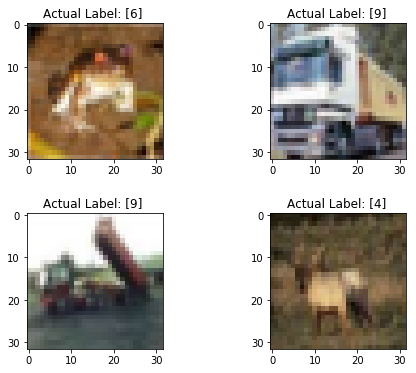

In [5]:
# Awesome, now let's look at some of the Images with which label they have

plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.4)
# Looking at 1st Image in Training Set with their Label!
plt.subplot(2,2,1)
plt.imshow(train_cifar10[0,:,:])
plt.title('Actual Label: {} '.format(train_cifar10_labels[0]));

# Looking at 2nd Image in Training Set with their Label!
plt.subplot(2,2,2)
plt.imshow(train_cifar10[1,:,:])
plt.title('Actual Label: {} '.format(train_cifar10_labels[1]));

# Looking at 3rd Image in Training Set with their Label!
plt.subplot(2,2,3)
plt.imshow(train_cifar10[2,:,:])
plt.title('Actual Label: {} '.format(train_cifar10_labels[2]));

# Looking at 4th Image in Training Set with their Label!
plt.subplot(2,2,4)
plt.imshow(train_cifar10[3,:,:])
plt.title('Actual Label: {} '.format(train_cifar10_labels[3]));
#plt.title('Looking at the first 4 images in Training Set with their Ground Truth labels!');


Similarly, I want to see the first 4 Training Images with their Labels

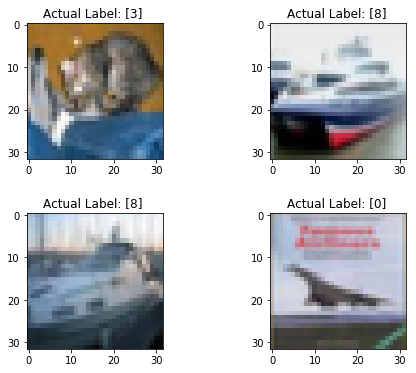

In [6]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.4)
# Looking at 1st Image in Testing Set with their Label!
plt.subplot(2,2,1)
plt.imshow(test_cifar10[0,:,:])
plt.title('Actual Label: {} '.format(test_cifar10_labels[0]));

# Looking at 2nd Image in Testing Set with their Label!
plt.subplot(2,2,2)
plt.imshow(test_cifar10[1,:,:])
plt.title('Actual Label: {} '.format(test_cifar10_labels[1]));

# Looking at 3rd Image in Testing Set with their Label!
plt.subplot(2,2,3)
plt.imshow(test_cifar10[2,:,:])
plt.title('Actual Label: {} '.format(test_cifar10_labels[2]));

# Looking at 4th Image in Training Set with their Label!
plt.subplot(2,2,4)
plt.imshow(test_cifar10[3,:,:])
plt.title('Actual Label: {} '.format(test_cifar10_labels[3]));
#plt.title('Looking at the first 4 images in Testing Set with their Ground Truth labels!');


So one thing which we see is that **8 is the Label** for a **SHIP**, which denotes that there are multiple images capturing different objects being in the same class!

#### Now let's preprocess the Data!
    1. First we will Normalize the data.  
    2. Since, the images will be fed as Numbers, it is important that we should convert the images numbers into **FLOATS**  
    3. Then we will change the Labels into Categories from Integer. We do this using the KERAS's -> to_catgeorical function, which performs one hot encoding!

In [7]:
print('Training Shape: ',train_cifar10.shape)

# So,

rows_we_need = train_cifar10.shape[1:2]
cols_we_need = train_cifar10.shape[2:3]
dimensions_we_need = train_cifar10.shape[3:]

print(rows_we_need,cols_we_need,dimensions_we_need)

# we can do the same using the below piece of code

rows_we_need,cols_we_need,dimensions_we_need = train_cifar10.shape[1:]
print('------Taking only integers-------------')
print(rows_we_need,cols_we_need,dimensions_we_need)

Training Shape:  (50000, 32, 32, 3)
(32,) (32,) (3,)
------Taking only integers-------------
32 32 3


In [8]:
train_data = train_cifar10.reshape(train_cifar10.shape[0],rows_we_need,cols_we_need,dimensions_we_need)
test_data = test_cifar10.reshape(test_cifar10.shape[0],rows_we_need,cols_we_need,dimensions_we_need)

#Changing to float

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Let's Scale these images so that the integers become between 0 and 1

train_data = train_data/255
test_data = test_data/255

In [9]:
# Now we will change the Labels from integer to Categorical Data where one hot encoding is performed
train_labels_cat = to_categorical(train_cifar10_labels)
test_lables_cat = to_categorical(test_cifar10_labels)

print('Label for 6th Image: ',train_cifar10_labels[5])
print('After Converting to Catgeorical: ',train_labels_cat[5])

print('=======----------Similarly----------=========')
print('Label for 363rd Image: ',train_cifar10_labels[365])
print('After Converting to Catgeorical: ',train_labels_cat[365])

Label for 6th Image:  [1]
After Converting to Catgeorical:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
=======----------Similarly----------=========
Label for 363rd Image:  [8]
After Converting to Catgeorical:  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


## Finally we have come to Creating a Model!


Steps are as followed:  
    1. First We create a **Sequential** Model  
    2. Then we add a **Convolution Layer**  
    3. Then we will add a **MAX POOLING LAYER**, we can use any other kind of Pooling Layer also.  
    4. Then followed by **DropOut** layer to protect model from overfitting  
    5. Then followed by **Dense Layer and Flatten Layer**.  
    
    

In [10]:
input_shape = (rows_we_need, cols_we_need, dimensions_we_need)

def model_number_1():
    model = Sequential()
    
    # First we will approach with 2 Layers with 32 filters of window size 3x3 and then we will keep playing around
    model.add(Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape = input_shape))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(total_classes,activation='softmax'))
    
    return model

In [11]:
model_1 = model_number_1()
batch_size = 256
epochs = 50

model_1.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics=['accuracy'])

model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [12]:
# So total trainable parameters are 2,76,138 which is quite OK, since many more casses we get over a million parameters to train

fitted_model = model_1.fit(train_data,train_labels_cat,batch_size=batch_size,epochs=epochs,verbose=1,
                          validation_data=(test_data,test_lables_cat))

model_1.evaluate(test_data,test_lables_cat)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 477s 10ms/step - loss: 2.1403 - acc: 0.2131 - val_loss: 2.0417 - val_acc: 0.2732
Epoch 2/50
50000/50000 [==============================] - 493s 10ms/step - loss: 1.7783 - acc: 0.3510 - val_loss: 1.5567 - val_acc: 0.4309
Epoch 3/50
50000/50000 [==============================] - 486s 10ms/step - loss: 1.5690 - acc: 0.4332 - val_loss: 1.6406 - val_acc: 0.4229
Epoch 4/50
50000/50000 [==============================] - 456s 9ms/step - loss: 1.4325 - acc: 0.4831 - val_loss: 1.3015 - val_acc: 0.5326
Epoch 5/50
50000/50000 [==============================] - 580s 12ms/step - loss: 1.3337 - acc: 0.5218 - val_loss: 1.1675 - val_acc: 0.5832
Epoch 6/50
50000/50000 [==============================] - 577s 12ms/step - loss: 1.2426 - acc: 0.5552 - val_loss: 1.2125 - val_acc: 0.5773
Epoch 7/50
50000/50000 [==============================] - 557s 11ms/step - loss: 1.1743 - acc: 0.5854 - val_loss: 1.3

[0.6267646428585052, 0.7973]

In [33]:
def model_number_2():
    model = Sequential()
    
    # First we will approach with 2 Layers with 32 filters of window size 3x3 and then we will keep playing around
    model.add(Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape = input_shape,data_format='channels_first'))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128,(3,3),padding = 'same',activation='relu'))
    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(total_classes,activation='softmax'))
    
    return model

In [34]:
model_2 = model_number_2()
batch_size = 256
epochs = 30

from keras.callbacks import EarlyStopping
model_2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 32, 32, 3)         9248      
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 6, 6, 64)          0         
__________

In [35]:
# So total trainable parameters are 2,76,138 which is quite OK, since many more casses we get over a million parameters to train

fitted_model = model_2.fit(train_data,train_labels_cat,batch_size=batch_size,epochs=epochs,verbose=1,
                          validation_data=(test_data,test_lables_cat),callbacks=[early_stopping_monitor])

model_2.evaluate(test_data,test_lables_cat)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 337s 7ms/step - loss: 2.0538 - acc: 0.2131 - val_loss: 1.8367 - val_acc: 0.3013
Epoch 2/30
50000/50000 [==============================] - 342s 7ms/step - loss: 1.8017 - acc: 0.3330 - val_loss: 1.7138 - val_acc: 0.3708
Epoch 3/30
50000/50000 [==============================] - 340s 7ms/step - loss: 1.6713 - acc: 0.3914 - val_loss: 1.5564 - val_acc: 0.4426
Epoch 4/30
50000/50000 [==============================] - 337s 7ms/step - loss: 1.5783 - acc: 0.4292 - val_loss: 1.4724 - val_acc: 0.4640
Epoch 5/30
50000/50000 [==============================] - 334s 7ms/step - loss: 1.5061 - acc: 0.4580 - val_loss: 1.4025 - val_acc: 0.4950
Epoch 6/30
50000/50000 [==============================] - 334s 7ms/step - loss: 1.4578 - acc: 0.4765 - val_loss: 1.3829 - val_acc: 0.5017
Epoch 7/30
50000/50000 [==============================] - 344s 7ms/step - loss: 1.4068 - acc: 0.4987 - val_loss: 1.3288 - 

[1.0959059881210327, 0.6128]

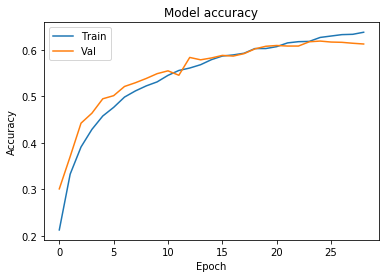

In [36]:
#Visualize the models accuracy
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

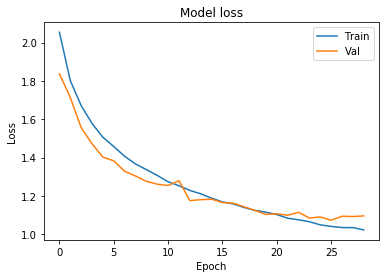

In [37]:
#Visualize the models loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

What we are trying is something like this:

    1. First we tried with 2 Layers of 32 Filters,4 layers of 64 filters and then a Flatten Layer with Dense Softmax layer.  
        a. Train Accuracy: 81%, validation accuracy 79%.  
        b. These figures could increase more as we provide more epochs which means more computaton time.  
    2. the 2nd Model which we are building has some tweaks:  
        a. we have 2 layers of 32,64 and 128 Filters each now and to save some time and computation speed, we have reduced the epochs to 30.  
        b. So the trainable parameters are around 5,54,794.  
        c. Also we have changed the Optimizer to **ADAM**, as it tweaks the learning rate on its own as it approached the minima.  
    3. Next we are going to build our last model, which will contain the following tweaks:  
        a. 1 layer of 32 filter,2 layers of 64 filters and one layer of 128 filters only.    
        b. Here we are trying to play around with layers to actually see the changes which we get.  
        c. We are still using the ADAM optimiser.  

In [50]:
def model_number_3():
    model = Sequential()
    
    # First we will approach with 2 Layers with 32 filters of window size 3x3 and then we will keep playing around
    model.add(Conv2D(32,(3,3),padding = 'same',activation='relu',input_shape = input_shape,data_format='channels_first'))
    #model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(64,(3,3),padding = 'same',activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Conv2D(128,(3,3),padding = 'same',activation='relu'))
    #model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(total_classes,activation='softmax'))
    
    return model

In [51]:
model_3 = model_number_3()
batch_size = 256
epochs = 30

from keras.callbacks import EarlyStopping
model_3.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=3)

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 32, 32, 3)         9248      
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 16, 16, 3)         0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 16, 16, 3)         0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 16, 16, 64)        1792      
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 12, 12, 64)        36928     
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 6, 6, 64)          0         
__________

In [ ]:
# So total trainable parameters are 2,76,138 which is quite OK, since many more casses we get over a million parameters to train

fitted_model = model_3.fit(train_data,train_labels_cat,batch_size=batch_size,epochs=epochs,verbose=1,
                          validation_data=(test_data,test_lables_cat),callbacks=[early_stopping_monitor])

model_3.evaluate(test_data,test_lables_cat)